In [1]:
import MITBIH
from torch.utils.data import Dataset
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import random

mask = np.full((10, 1, 128), True)
for sample in range(len(mask)):
    for ch in range(len(mask[0])):
        mask[sample][ch][:20] = False
        np.random.shuffle(mask[sample][ch])

In [3]:
mask[2][0]

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]

In [4]:
mask = np.full((10, 1, 128), True)

In [5]:
mask[0][0][:20] = False

In [6]:
np.random.shuffle(mask[0][0])
mask[0][0]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True]

In [7]:
from MITBIH import mitbih_masked

cond_data = mitbih_masked(filename = "../heartbeat/mitbih_train.csv")

Data shape of Non-Ectopic Beats instances = (72471, 1, 128)


In [8]:
from torch.utils import data

dataloader = data.DataLoader(cond_data, batch_size=1, num_workers=1, shuffle=True)

In [9]:
import matplotlib.pyplot as plt
org_sigs = []
cond_sigs = []

for i, data_dict in enumerate(dataloader):
    org_sigs.append(data_dict['org_data'])
    cond_sigs.append(data_dict['cond_data'])
    
    if i >= 9: 
        break

In [10]:
org_sigs[0].shape

torch.Size([1, 1, 128])

In [11]:
def pot_signals(signals):
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    for i in range(2):
        for j in range(5):
            for k in range(1):
                axs[i, j].plot(signals[i*5+j][0][k][:])
    

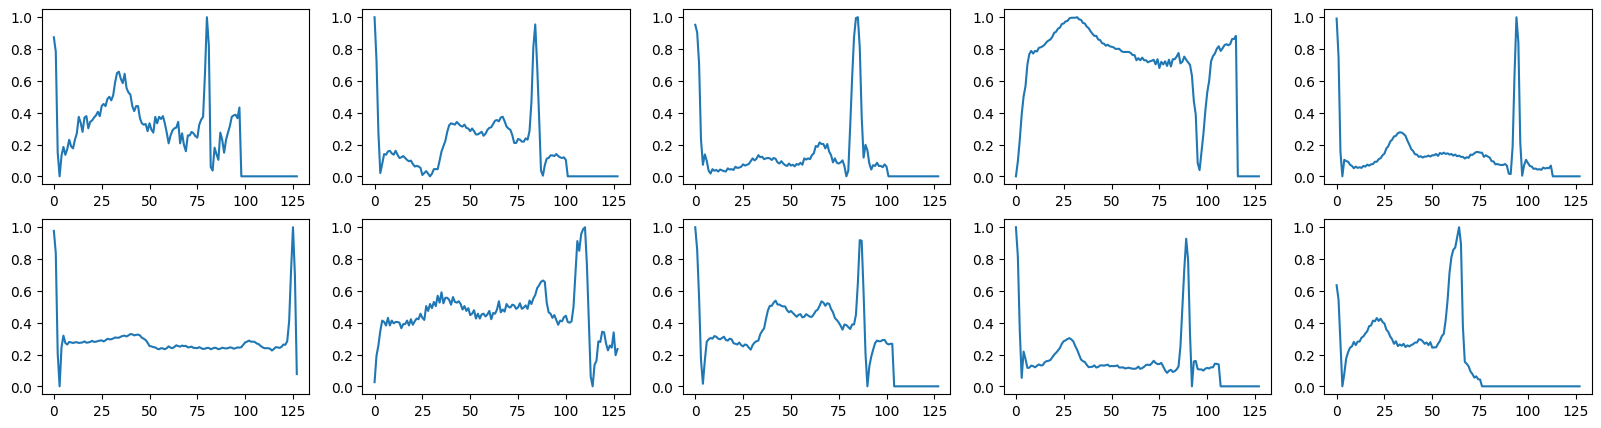

In [12]:
pot_signals(org_sigs)

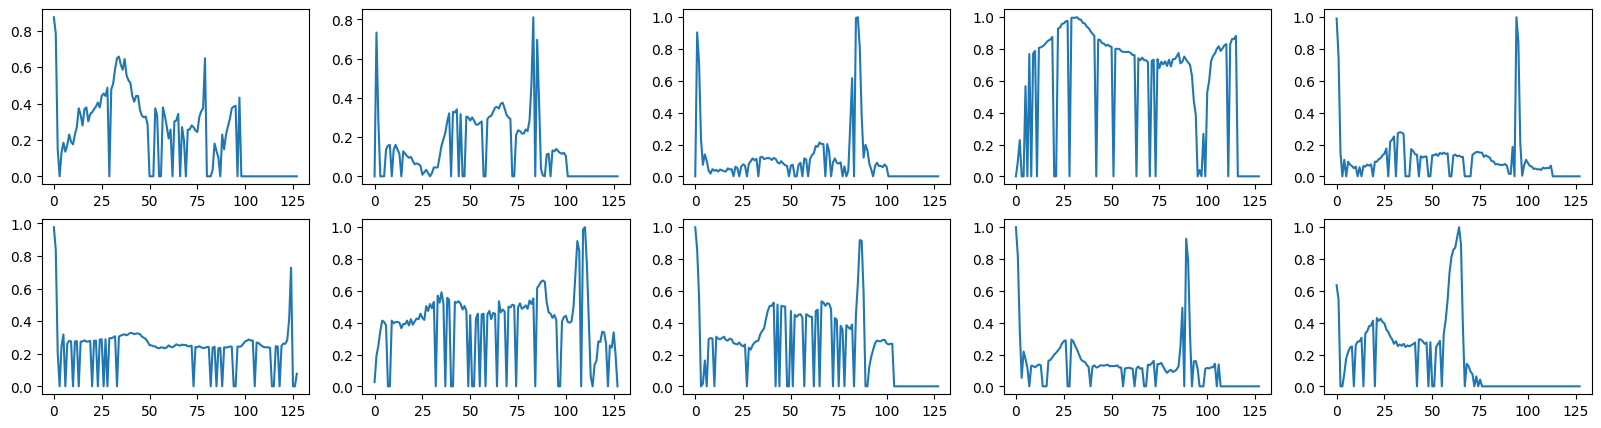

In [13]:
pot_signals(cond_sigs)

In [14]:
data_point1 = cond_data.cond_data[0]
print(data_point1.shape)

(1, 128)


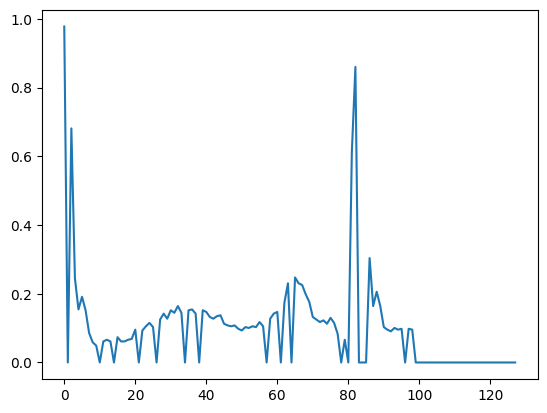

In [15]:
plt.plot(data_point1[0][:])

In [17]:

cond_mul10 = np.array([data_point1] * 10)
print(cond_mul10.shape)
cond_data = torch.from_numpy(cond_mul10)
cond_data = cond_data.to(torch.float)

(10, 1, 128)


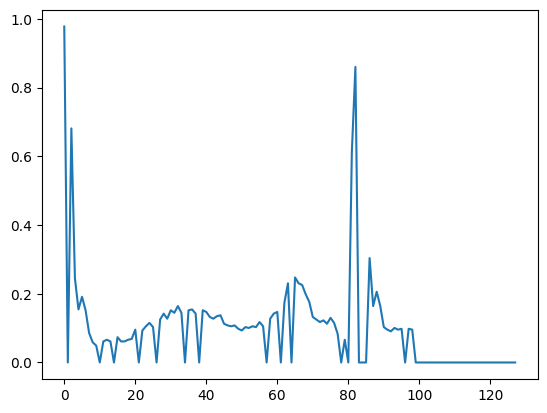

In [18]:
plt.plot(cond_mul10[1][0])
plt.show()